In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import matplotlib.pyplot as plt

E:\Ana\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\Ana\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\Ana\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [49]:
# load the dataset
vix_data = pd.read_csv('vix_data.csv', parse_dates=['Date'])
vix_data['Date'] = vix_data['Date'].astype('int64') // 10**9  # convert to numeric format

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vix_data[['Date']], vix_data['Close'], test_size=0.2)

C:\Users\owner\AppData\Local\Temp/ipykernel_21336/1071977620.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  vix_data['Date'] = vix_data['Date'].astype('int64') // 10**9  # convert to numeric format


In [50]:
# create the XGBoost model
model = xgb.XGBRegressor(random_state=42)

# define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# perform a grid search over the hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# get the best model from the grid search
model = grid_search.best_estimator_

In [51]:
# make predictions on the testing data
y_pred = model.predict(X_test)

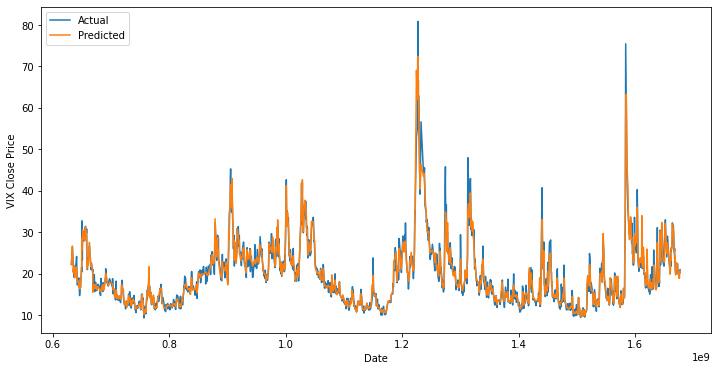

In [52]:
# create a dictionary of data
data = {'Date': X_test.values.ravel(), 'Actual': y_test.values.ravel(), 'Predicted': y_pred.ravel()}

# create a pandas DataFrame from the data
df = pd.DataFrame(data)

# sort the DataFrame by date
df.sort_values(by='Date', inplace=True)

# plot the sorted data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Date'], df['Actual'], label='Actual')
ax.plot(df['Date'], df['Predicted'], label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('VIX Close Price')
ax.legend()
plt.show()

In [53]:
# calculate the evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# print the evaluation metrics
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2: {r2:.2f}')
print(f'Median Absolute Error: {medae:.2f}')

RMSE: 1.60
MAE: 0.98
R^2: 0.95
Median Absolute Error: 0.64
